# Practical work 2 : Fourier transform

This practial work is dedicated to the study of the discrete Fourier transform applied on the two following images:
![son.png](./img/son.png)
![sonrot.png](./img/sonrot.png)
and analyze the properties of their spectrum. To this end, we make use of the following functions provided by the module `numpy.fft`:

- `fft2()` to compute the Fourier transform on an image
- `fftshift()` to center the low frequencies
- `abs()` (from `numpy`) to compute the module of a complexe array

In most of cases, high frequencies have lower energy compare to low frequencies. We will use a logarithmic scale by applying $\log(1+abs(TF))$ to display the spectrum.

In [1]:
import numpy as np
from numpy.fft import fft2,fftshift
from PIL import Image

son = 255*np.array(Image.open('img/son.png'))
sonrot = np.array(Image.open('img/sonrot.png'))

## Exercice: properties of Fourier transform applied on natural images
1. Write the following functions:
 - `computeFT(I)` returning the Fourier transform of image `I`,
 - `toVisualizeFT(If)` returning the centered module of a complex array `If` (the Fourier transform of an image),
 - `toVisualizeLogFT(If)` similar to the previous function but use a logarithmic scale.

In [21]:
def computeFT(I):
    """ Array -> Array[complex] """
    return fft2(I)
    
def toVisualizeFT(If):
    """ Array[complex] -> Array[float] """
    return fftshift(np.abs(If))

def toVisualizeLogFT(If):
    """ Array[complex] -> Array[float] """
    return np.log10(toVisualizeFT(If)+1)


2. Write a series of instructions that
 - compute the Fourier transform of `son` and `sonrot`,
 - compute and display the module using a logarithmic scale,
 - threshold the module with a parameter of $1.10^5$ (use the function of TME1)
 - display the thresholded spectrum

In [25]:
def threshold(I,s):
    return np.where(I<s,0,255)

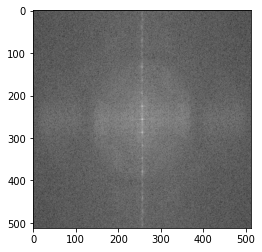

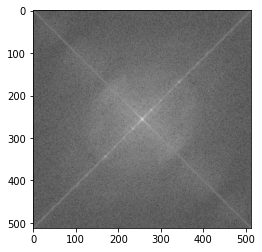

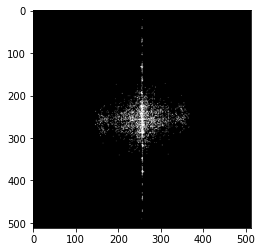

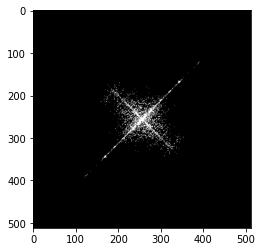

In [30]:
import matplotlib.pyplot as plt

# your code below
#computing the Fourier transform
sonf = computeFT(son)
sonrotf = computeFT(sonrot)

#visualizing with a log scale
plt.imshow(toVisualizeLogFT(sonf),cmap='gray')
plt.show()
plt.imshow(toVisualizeLogFT(sonrotf),cmap='gray')
plt.show()

#visualizing with a log scale after applying the threshold
plt.imshow(toVisualizeLogFT(threshold(np.abs(sonf),10**5)),cmap='gray')
plt.show()
plt.imshow(toVisualizeLogFT(threshold(np.abs(sonrotf),10**5)),cmap='gray')
plt.show()

3. Interpretation: discuss the results obtained on thresholded FT module. What property of the Fourier transform is shown ?

The main axis in the second FT is tilted from the vertical one in the first FT, the same way 'sonrot' is in comparison to 'son'. This is an example of the rotation property of the FT, where a rotation of angle $\theta$ in the spatial domain induces the same rotation in the frequency domain.

4. Write the function `blend()` getting two images, one float parameter $\alpha\in[0,1]$, calculating $\alpha I_1+(1-\alpha)I_2$ and returning the result. 

In [27]:
def blend(I1,I2,alpha):
    """ Array**2*float -> Array """
    return alpha*I1+(1-alpha)*I2

5. Apply the previous function on images `son` and `sonrot` and $\alpha=\frac12$, compute the Fourier transform, threshold the module and visualize the result. 

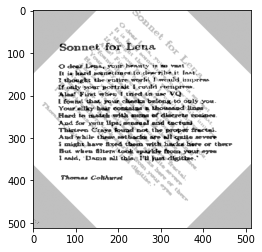

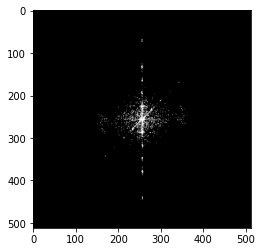

In [77]:
b = blend(son,sonrot,3/4)
plt.imshow(b,cmap='gray')
plt.show()
plt.imshow(toVisualizeLogFT(threshold(np.abs(computeFT(b)),10**5)),cmap='gray')
plt.show()

6. Compare the latter result with those of question 2: what property of the Fourier transform is shown? What is the behaviour of $\alpha$ in the resulting spectrum?

The newest image shows a mixture of the main orientations from FT images in question 2. This demonstrates the linear property of the FT where the FT of the sum of images is equal to the sum of the FT of each one. Here, $\alpha$ is the weight of image $I_1$ in the mixture, the more important $\alpha$ is, the more $I_1$ will shows through in the blended image and the resulting spectrum will show the main orientation of $I_1$.

7. We want to determine the text orientation in image `sonrot` and produce a new image with horizontal text. Write the function `rectifyOrientation()` that:

 + computes the FT module of image given in parameter and threshold it at $3\times 10^{5}$,
 + from thresholded module determines the main orientation using the function `mainOrientation()` 
 + produces the rectified image applying a rotation with a suitable angle using `rotateImage()`

In [87]:
def mainOrientation(I):
    """ Array -> tuple[Iori,float]
        return image of orientation (32 bins) and the main orientation (degree) from a Fourier transform module
    """
    n, m = I.shape

    size = 32
    x = np.array(range(size))
    ori = np.vstack((np.cos(np.pi*x/size), np.sin(np.pi*x/size))).T

    Iori = np.zeros((n, m))
    orients = np.zeros((size))

    for i in range(1,n+1):
        for j in range(1,m+1):
            if I[i-1, j-1] > 0:
                v = np.array([j-m/2, -i + n/2])
                if i > n/2:
                    v = -v
                    prod = np.matmul(ori, v)
                    maxi = prod.max()
                    if maxi > 0:
                        imax = np.nonzero(prod == maxi)
                        Iori[i-1, j-1] = imax[0]
                        orients[imax] += 1

    maxori = np.nonzero(orients == orients.max())[0][0]
    return (Iori, 180*maxori/size - 90)

def rotateImage(I,a):
    """ Array*float -> Array 
        return a rotation of angle a (degree) of image I
    """
    return np.array(Image.fromarray(I).rotate(a, expand=True, fillcolor=127))

####### your code below

def rectifyOrientation(I):
    If = threshold(np.abs(computeFT(I)),10**5)
    Iori,o = mainOrientation(If)
    #plt.imshow(toVisualizeLogFT(If),cmap='gray')
    #plt.show()
    print('Estimated orientation:'+str(o))
    res = rotateImage(I,-o)
    #plt.imshow(toVisualizeLogFT(threshold(np.abs(computeFT(res)),10**5)),cmap='gray')
    #plt.show()
    return res   


8. Experiment `rectifyOrientation()` on `sinrot`, and on a rotation of `img/port.jpg` (using `rotateImage()`) with various rotation angles.  

Estimated orientation:-45.0


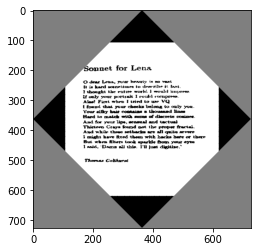

In [88]:
plt.imshow(rectifyOrientation(sonrot),cmap='gray')
plt.show()

Estimated orientation:45.0


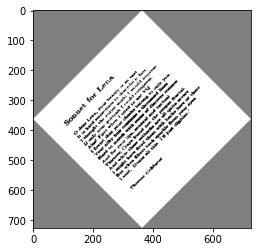

In [89]:
plt.imshow(rectifyOrientation(rotateImage(son,90)),cmap='gray')
plt.show()

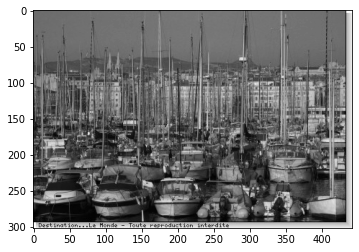

In [55]:
port = np.array(Image.open('img/port.jpg'))
plt.imshow(port,cmap='gray')
plt.show()

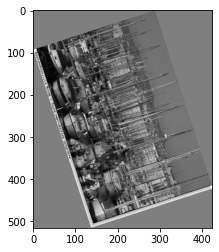

Estimated orientation:-39.375


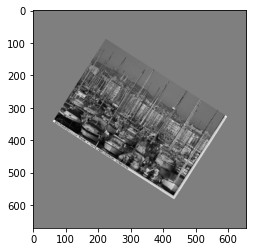

In [90]:
port_72 = rotateImage(port,-72)
plt.imshow(port_72,cmap='gray')
plt.show()
plt.imshow(rectifyOrientation(port_72),cmap='gray')
plt.show()

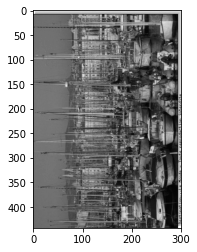

Estimated rotating angle:-33.75


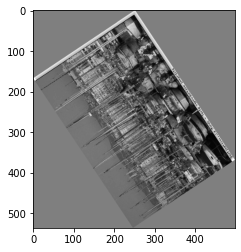

In [82]:
port90 = rotateImage(port,90)
plt.imshow(port90,cmap='gray')
plt.show()
plt.imshow(rectifyOrientation(port90),cmap='gray')
plt.show()

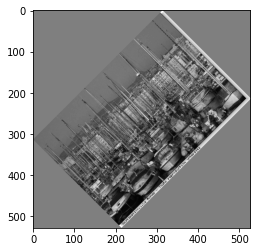

Estimated orientation:45.0


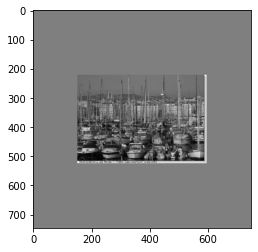

In [91]:
port45 = rotateImage(port,45)
plt.imshow(port45,cmap='gray')
plt.show()
plt.imshow(rectifyOrientation(port45),cmap='gray')
plt.show()

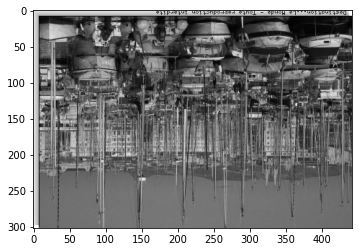

Estimated orientation:-56.25


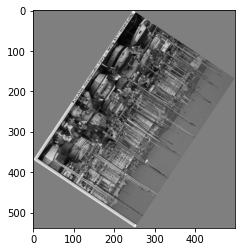

In [92]:
port180 = rotateImage(port,180)
plt.imshow(port180,cmap='gray')
plt.show()
plt.imshow(rectifyOrientation(port180),cmap='gray')
plt.show()

It can be seen that mainOrientation does not handle well rotations of angle other than $45+90k, k \in Z$. Furthermore, the image 'port' contains more details where there is a mixture of low/high frequencies which makes it harder to find a main orientation in the FT spectrum.